In [1]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = op.join('C:/Users/csilv/Desktop/UNB Gama/7 Semestre/Processamento de Sinais/Normal_Subject_01.edf') #Define data_path
raw = mne.io.read_raw_edf(data_path) #read raw data

Extracting EDF parameters from C:\Users\csilv\Desktop\UNB Gama\7 Semestre\Processamento de Sinais\Normal_Subject_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
raw.info['chs'][0]['kind'] = 202
raw.info['chs'][1]['kind'] = 202
raw.info['chs'][2]['kind'] = 202
raw.info['chs'][3]['kind'] = 202
raw.info['chs'][18]['kind'] = 202
raw.info['chs'][19]['kind'] = 202

In [4]:
raw.info['bads'] = ['EMG', 'EMG1', 'EMG2', 'ECGII']

In [5]:
picks = mne.pick_types(raw.info, eeg=True, eog= True, exclude = raw.info['bads'])

In [ ]:
without_filter = raw.plot_psd(fmax = 60)

In [6]:
raw.load_data()
raw.notch_filter(np.arange(50, 100, 50), picks=picks, fir_design='firwin') #notch filter at 50, 100, 150 and 200

Reading 0 ... 7366399  =      0.000 ... 28774.996 secs...
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [ ]:
#notch_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

In [7]:
raw.filter(None, 40., picks=picks, fir_design='firwin') # low pass filtering below 40 Hz'
#low_pass_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 85 samples (0.332 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [8]:
raw.filter(1., None, picks=picks, fir_design='firwin') #high pass filtering above 1Hz
#high_pass_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [9]:
raw.info['ch_names']

['EOG1',
 'EOG2',
 'EOG1A1',
 'EOG2A1',
 'C4A1',
 'C3A2',
 'F3',
 'F4',
 'C3',
 'C4',
 'A1',
 'A2',
 'O1',
 'O2',
 'ECGII',
 'EMG',
 'EMG1',
 'EMG2',
 'EOG1A2',
 'EOG2A2',
 'F3A2',
 'F4A1',
 'O1A2',
 'O2A1']

In [19]:
events = mne.make_fixed_length_events(raw, duration = 30.)

In [20]:
reject = dict(eeg = 150e-6, eog = 250e-6)

In [36]:
epochs = mne.Epochs(raw, events=events, picks=picks, reject=None, preload=True, tmin=-1.5, tmax=1.5) #Define trials

959 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 959 events and 769 original time points ...
1 bad epochs dropped


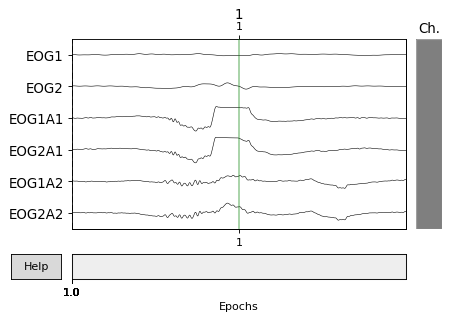

In [48]:
top = epochs[4].plot(picks=['EOG1A1', 'EOG1A2', 'EOG2A1', 'EOG2A2', 'EOG1', 'EOG2'])

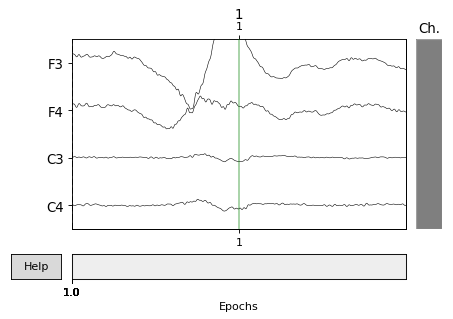

In [49]:
no_plot = epochs[4].plot(picks=['F3', 'F4', 'C3', 'C4'])